In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.units as u
import pickle
import os
import sys
sys.path.insert(0, '/work/08811/aew492/frontera/small-scale_cross-corrs')
from illustris_sim import TNGSim
import tools
from xcorr_cases import SPHEREx_Xcorr

### angular cross-correlation, photometric x spectroscopic galaxies

In [6]:
# main inputs
snapshotss = [
    np.arange(25, 37),  # center at z=2.3
    np.arange(43, 58), # center at z=1.
    np.arange(59, 76) # center at z~0.4
]
# the 5 redshift error bins in SPHEREx
sigma_zs = [
    0.003,
    0.01,
    0.03,
    0.1,
    0.2
]
# galaxy number density
density = 2e-3 * (u.littleh / u.Mpc)**3

starting snapshots 25-36, sigma_z=0.003


computing angular xcorrs from pair counts
computing angular xcorrs from linear theory


/work/08811/aew492/frontera/small-scale_cross-corrs/linear_theory.py:78: RuntimeWarning: invalid value encountered in sqrt
  ratio = np.sqrt(galxgal / tools.linear_2pcf(redshift, ravg))


saved class instance to /scratch1/08811/aew492/TNG300-3/xcorr_res/xcorr_z-1.74-3.01_sigma-z-0.003_ns-fixed_2.0e-03.pkl
starting snapshots 25-36, sigma_z=0.01
computing angular xcorrs from pair counts
computing angular xcorrs from linear theory
saved class instance to /scratch1/08811/aew492/TNG300-3/xcorr_res/xcorr_z-1.74-3.01_sigma-z-0.01_ns-fixed_2.0e-03.pkl
starting snapshots 25-36, sigma_z=0.03
computing angular xcorrs from pair counts
computing angular xcorrs from linear theory
saved class instance to /scratch1/08811/aew492/TNG300-3/xcorr_res/xcorr_z-1.74-3.01_sigma-z-0.03_ns-fixed_2.0e-03.pkl
starting snapshots 25-36, sigma_z=0.1
computing angular xcorrs from pair counts
computing angular xcorrs from linear theory
saved class instance to /scratch1/08811/aew492/TNG300-3/xcorr_res/xcorr_z-1.74-3.01_sigma-z-0.1_ns-fixed_2.0e-03.pkl
starting snapshots 25-36, sigma_z=0.2
computing angular xcorrs from pair counts
computing angular xcorrs from linear theory
saved class instance to /scrat

/work/08811/aew492/frontera/venv/illustris/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


computing angular xcorrs from pair counts
computing angular xcorrs from linear theory
saved class instance to /scratch1/08811/aew492/TNG300-3/xcorr_res/xcorr_z-0.35-0.70_sigma-z-0.003_ns-fixed_2.0e-03.pkl
starting snapshots 59-75, sigma_z=0.01
computing angular xcorrs from pair counts
computing angular xcorrs from linear theory
saved class instance to /scratch1/08811/aew492/TNG300-3/xcorr_res/xcorr_z-0.35-0.70_sigma-z-0.01_ns-fixed_2.0e-03.pkl
starting snapshots 59-75, sigma_z=0.03
computing angular xcorrs from pair counts
computing angular xcorrs from linear theory
saved class instance to /scratch1/08811/aew492/TNG300-3/xcorr_res/xcorr_z-0.35-0.70_sigma-z-0.03_ns-fixed_2.0e-03.pkl
starting snapshots 59-75, sigma_z=0.1
computing angular xcorrs from pair counts
computing angular xcorrs from linear theory
saved class instance to /scratch1/08811/aew492/TNG300-3/xcorr_res/xcorr_z-0.35-0.70_sigma-z-0.1_ns-fixed_2.0e-03.pkl
starting snapshots 59-75, sigma_z=0.2
computing angular xcorrs from 

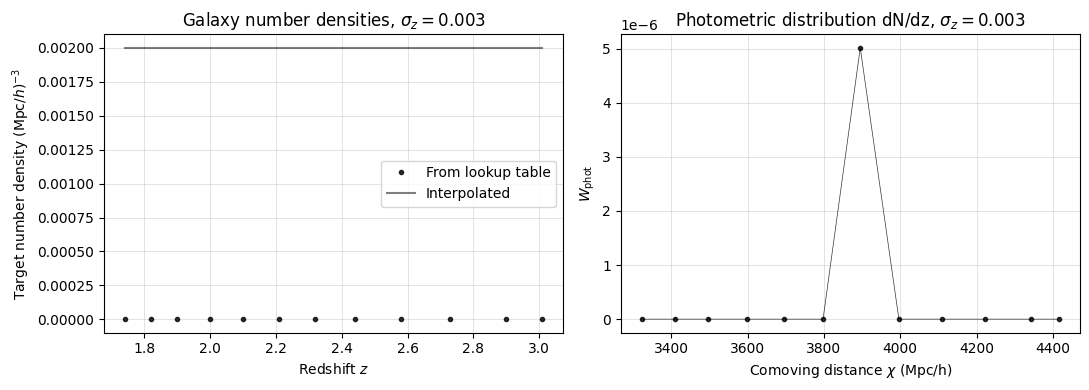

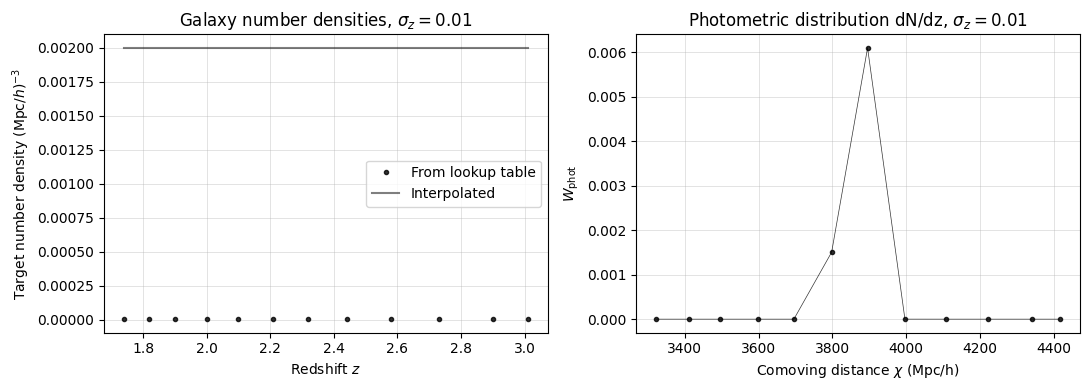

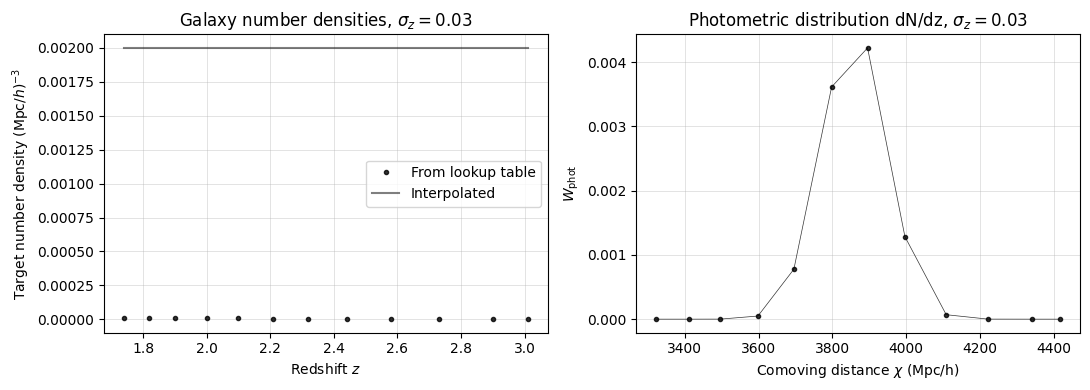

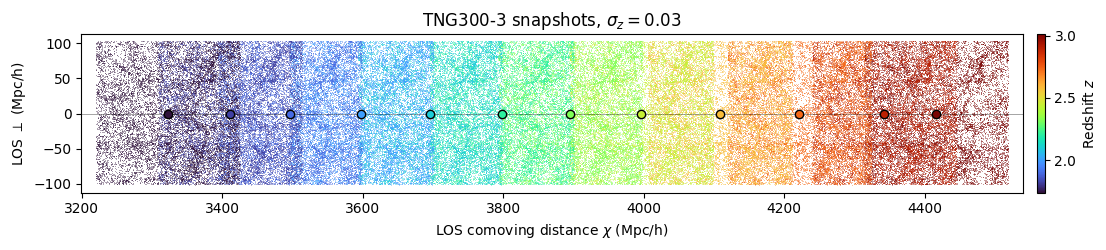

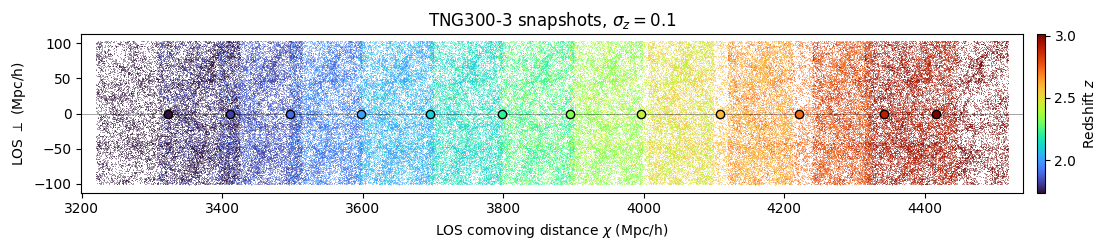

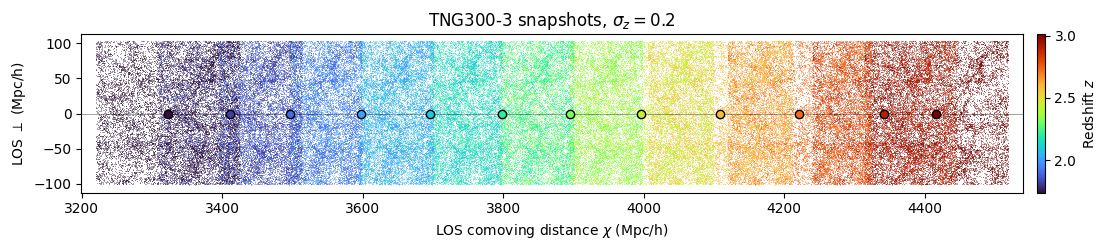

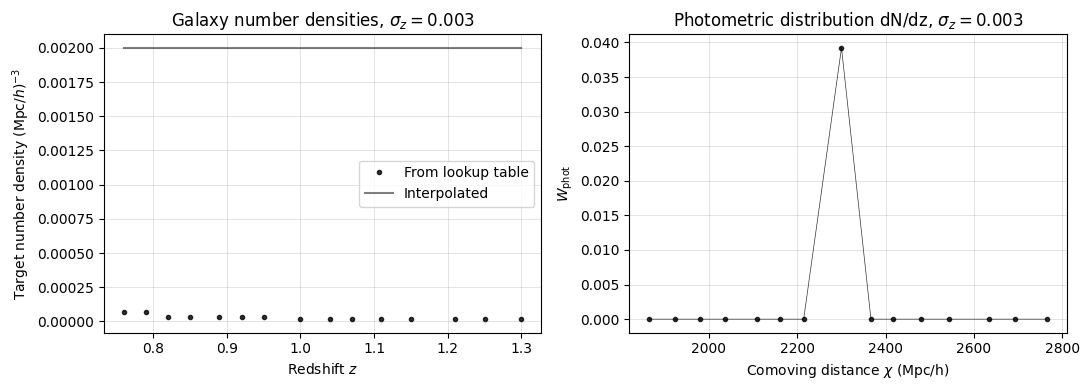

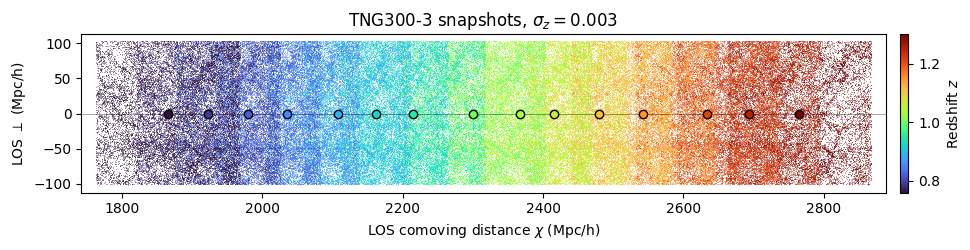

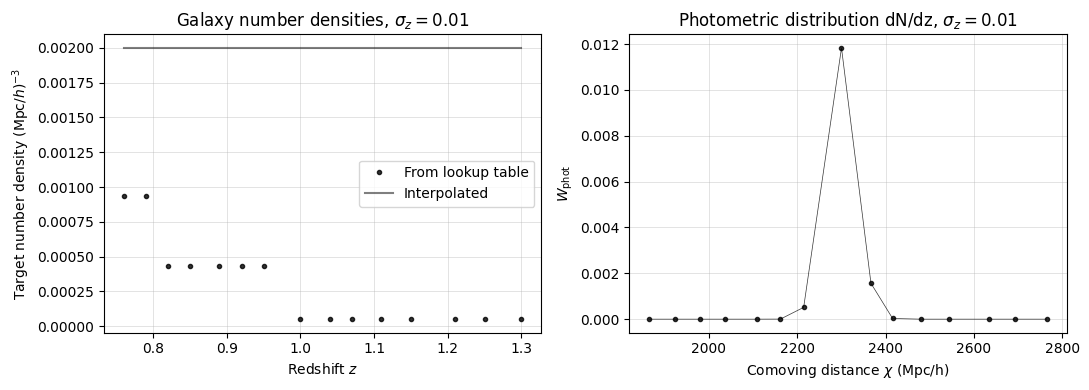

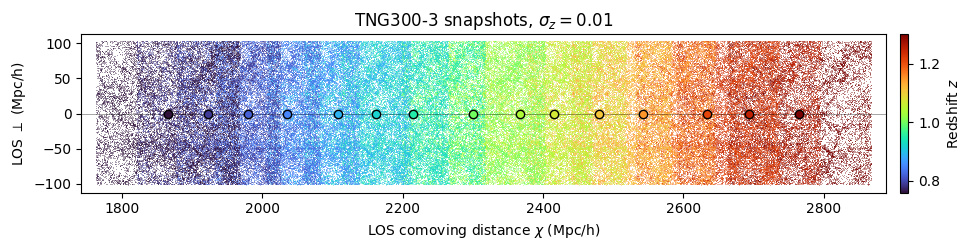

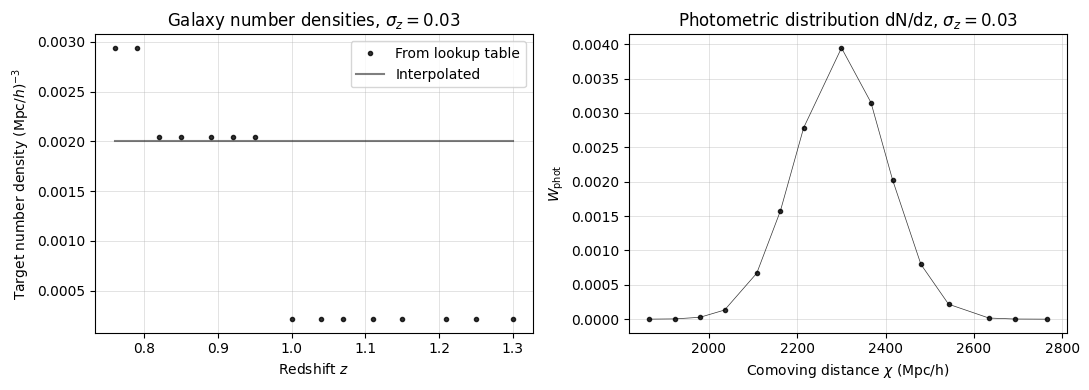

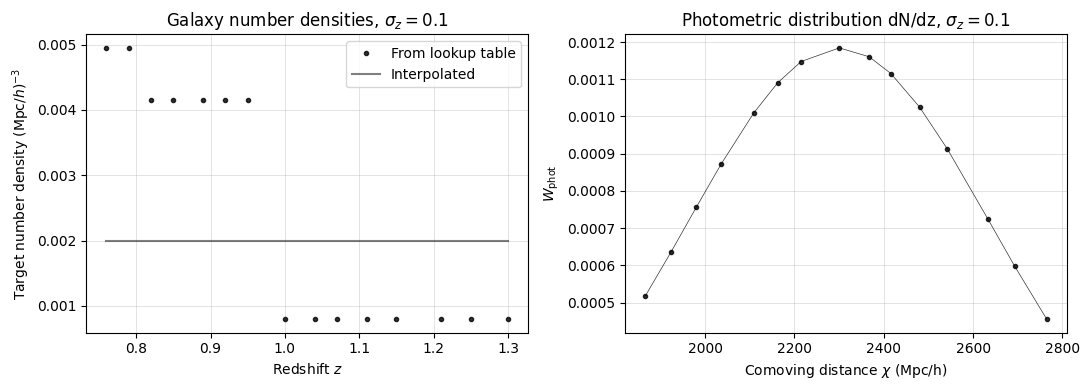

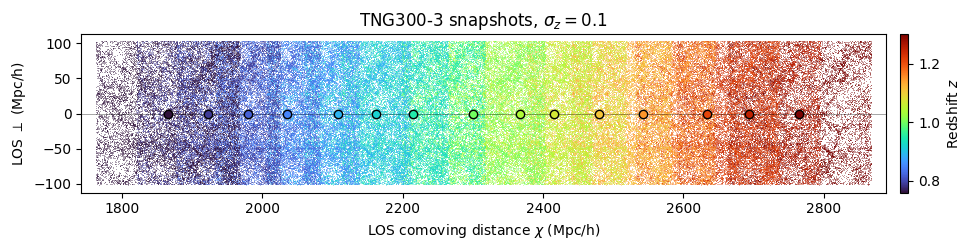

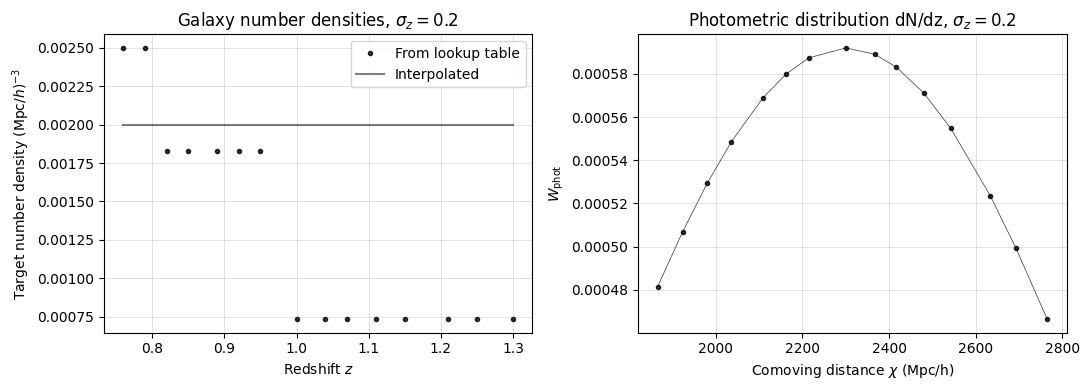

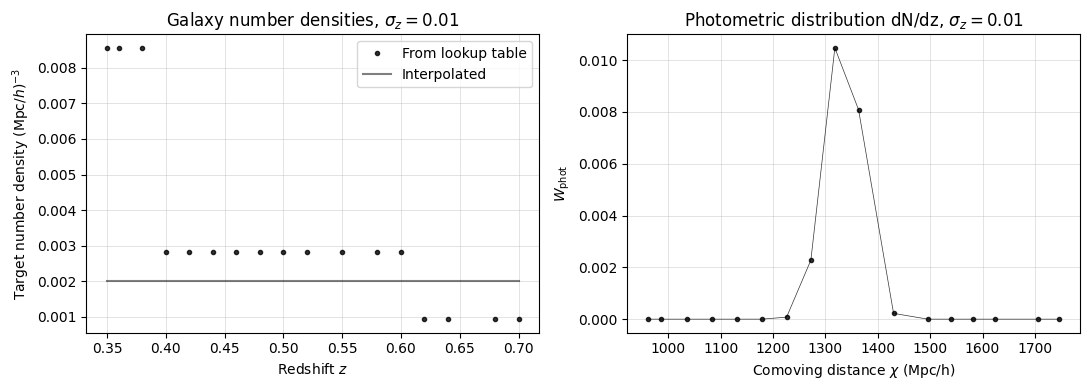

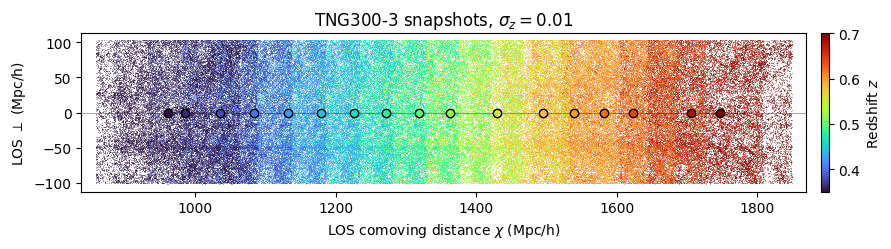

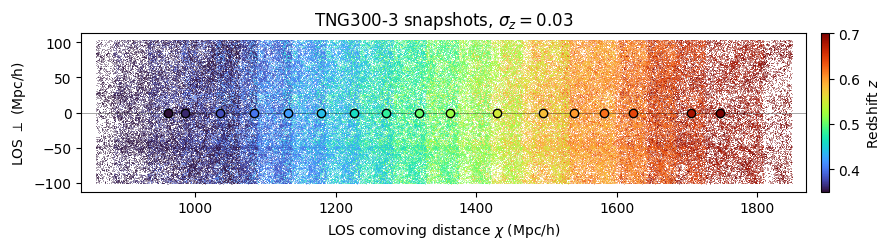

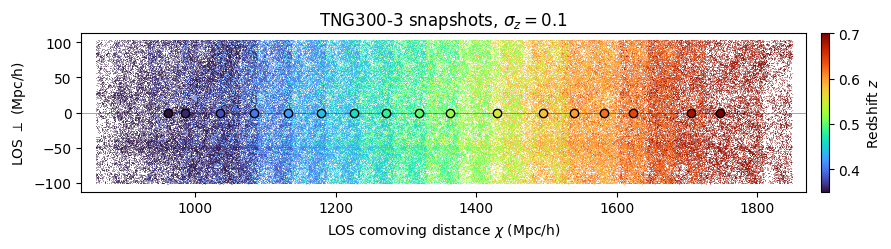

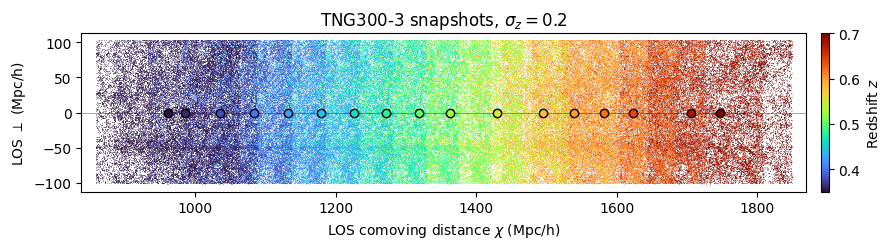

In [18]:
for i, snapshots in enumerate(snapshotss):
    for j, sigma_z in enumerate(sigma_zs):
        
        print(f"starting snapshots {min(snapshots)}-{max(snapshots)}, sigma_z={sigma_z}")
        # instantiate spherex set for cross-correlation
        X = SPHEREx_Xcorr(snapshots, sigma_z, density_type='fixed', density=density)
        
        save_fn = os.path.join(X.scratch, 'TNG300-3/xcorr_res',
            f'xcorr_z-{min(X.redshifts):.2f}-{max(X.redshifts):.2f}_sigma-z-{X.sigma_z}_ns-{X.density_type}_{density.value:.1e}.pkl')
        if os.path.exists(save_fn):
            print(f"already exists at {save_fn}")
            continue
        
        # plot key info for this set
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(11,4), tight_layout=True)
        # number densities
        ax0.plot(X.redshifts, X.target_ns, 'k.', alpha=0.8, label='From lookup table')
        ax0.plot(X.redshifts, X.ns, 'k-', alpha=0.5, label='Interpolated')
        ax0.grid(alpha=0.5, lw=0.5)
        ax0.set_xlabel(r'Redshift $z$')
        ax0.set_ylabel(r'Target number density (Mpc/$h)^{-3}$')
        ax0.legend()
        ax0.set_title(r'Galaxy number densities, $\sigma_z=$'f'{X.sigma_z}')

        # dN/dz
        ax1.plot(X.chis, X.dNdz, 'k.-', alpha=0.8, lw=0.5)
        ax1.grid(alpha=0.5, lw=0.5)
        ax1.set_xlabel(r'Comoving distance $\chi$ (Mpc/h)')
        ax1.set_ylabel(r'$W_\mathrm{phot}$')
        ax1.set_title(r'Photometric distribution dN/dz, $\sigma_z=$'f'{X.sigma_z}')
        
        # compute the spectroscopic galaxies in each snapshot
        X.construct_spectroscopic_galaxy_samples()
        
        # plot
        norm = mpl.colors.Normalize(vmin=min(X.redshifts), vmax=max(X.redshifts))
        smap = mpl.cm.ScalarMappable(norm=norm, cmap='turbo')
        fig, ax = plt.subplots(figsize=(15,2.6), tight_layout=True)
        for i, chi in enumerate(X.chis):
            gal_pos_spec_ = np.copy(X.gal_pos_specs[i])
            gal_pos_spec_[:,2] += chi
            kwargs = dict(c=smap.to_rgba(X.redshifts[i]), ls='None')
            ax.plot(gal_pos_spec_[:,2], gal_pos_spec_[:,0], marker=',', alpha=0.4, **kwargs)
            ax.plot(chi, 0, marker='o', c=smap.to_rgba(X.redshifts[i]), mec='k', zorder=100)
            ax.axvline((chi - X.boxsize/2).value, alpha=0.8, **kwargs)
            ax.axvline((chi + X.boxsize/2).value, alpha=0.8, **kwargs)
        ax.axhline(0, c='k', alpha=0.5, lw=0.5)
        ax.set_aspect('equal')
        ax.set_xlim((min(X.chis)-0.6*X.boxsize).value, (max(X.chis)+0.6*X.boxsize).value)
        ax.set_xlabel(r'LOS comoving distance $\chi$ (Mpc/h)')
        ax.set_ylabel(r'LOS $\perp$ (Mpc/h)')
        ax.set_title(f'{X.sim} snapshots, 'r'$\sigma_z=$'f'{X.sigma_z}')
        fig.colorbar(smap, ax=ax, label='Redshift $z$', pad=0.01)
        
        # compute angular cross-correlation
        X.compute_angular_xcorrs()
        
        # save the class
        with open(save_fn, 'wb') as output:
            pickle.dump(X, output)
        print(f"saved class instance to {save_fn}")

Text(0.45, 0.95, 'Phot. x spec. cross-correlation, $z=$0.76-1.3, $\\sigma_z=$0.1 (d$x=$337 Mpc/h)')

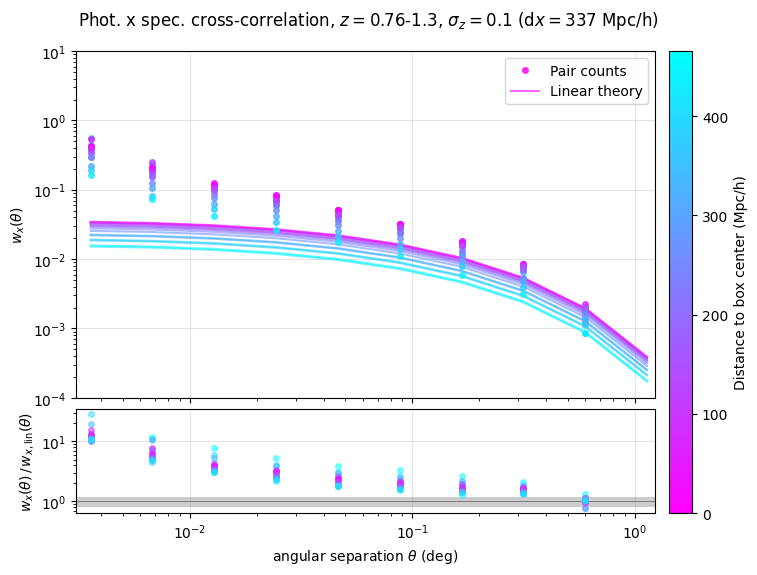

In [10]:
# plot the cross-correlations
norm = mpl.colors.Normalize(vmin=0, vmax=np.amax(np.abs(X.chis-X.central_chi).value))
smap = mpl.cm.ScalarMappable(norm=norm, cmap='cool_r')
fig = plt.figure(figsize=(9,6))
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1,0.3], hspace=0.05)

ax0 = fig.add_subplot(gs[0])
for i, w in enumerate(X.wthetax):
    kwargs = dict(c=smap.to_rgba(np.abs(X.chis[i] - X.central_chi).value))
    label = 'Pair counts' if i==len(X.wthetax)//2 else ''
    ax0.plot(X.theta_avg, w, marker='o', ms=4, ls='None', alpha=0.8, label=label, **kwargs)
    label = 'Linear theory' if i==len(X.wthetax)//2 else ''
    ax0.plot(X.theta_avg, X.wthetax_lin[i], alpha=0.6, label=label, **kwargs)
# secax = ax0.secondary_xaxis('top', functions=(theta_to_r_comov_, r_comov_to_theta_))
# secax.set_xlabel(r'separation $r_p$ (Mpc/h)')
ax0.set_ylim(1e-4,1e1)
ax0.set_ylabel(r'$w_x(\theta)$')
ax0.legend()

ax1 = fig.add_subplot(gs[1])
ax1.axhline(1., c='k', alpha=0.5, lw=0.5)
for i, w in enumerate(X.wthetax):
    ax1.plot(X.theta_avg, w / X.wthetax_lin[i], marker='o', ms=4, alpha=0.5, ls='None',
             c=smap.to_rgba(np.abs(X.chis[i] - X.central_chi).value))
ax1.axhspan(0.8, 1.2, facecolor='k', alpha=0.2)
ax1.set_ylabel(r'$w_x(\theta)\,/\,w_{x,\mathrm{lin}}(\theta)$')
ax1.set_xlabel(r'angular separation $\theta$ (deg)')

for ax in (ax0, ax1):
    ax.loglog()
    ax.grid(alpha=0.5, lw=0.5)
    ax.set_xlim(min(X.theta_avg)-5e-4, max(X.theta_avg)+1e-1)

fig.colorbar(smap, ax=[ax0,ax1], label='Distance to box center (Mpc/h)', pad=0.02)
fig.suptitle(r'Phot. x spec. cross-correlation, $z=$'f'{min(X.redshifts)}-{max(X.redshifts)}, ' + \
             r'$\sigma_z=$'f'{X.sigma_z} (d'r'$x=$'f'{X.dx.value:.0f} Mpc/h)',
             x=0.45, y=0.95)

In [16]:
with open(save_fn, 'rb') as file:
    Q = pickle.load(file)